# tidyX examples

In [1]:
# pip install tidyX==1.5.4

In [2]:
!pip show tidyX

Name: tidyX
Version: 1.5.4
Summary: Python package to clean raw tweets for ML applications
Home-page: 
Author: Lucas Gómez Tobón, Jose Fernando Barrera
Author-email: lucasgomeztobon@gmail.com, jf.barrera10@uniandes.edu.co
License: MIT
Location: c:\users\lucas\anaconda3\envs\bx\lib\site-packages
Requires: emoji, nltk, numpy, pandas, regex, spacy, thefuzz, Unidecode
Required-by: 


In [3]:
from tidyX import TextPreprocessor as tp
from tidyX import TextNormalization as tn
from tidyX import TextVisualizer as tv

## 1. `remove_repetitions`
**Description of the function**

This function deletes any consecutive repetition of characters in a string. For example, the string 'coooroosooo' will be changed to 'coroso'. As in many languages it's common to have some special characters that can be repeated, for example the 'l' in spanish to form 'll', the exception argument could be used to specify which characters are allowed to repeat once.

**When is it useful to use it?**

In social media, it is common for people to repeat certain characters of a word in order to add more emotion to a sentence. However, when we attempt to count the occurrences of a word, the various ways in which a word can be written make it difficult to uniquely identify each instance. One simple solution to this issue is to use the `remove_repetitions` function. Let's consider the following tweet:

<center>
<img src="remove_repetitions1.png" alt="remove_repetitions1" height=300px />
</center>

In this particular case, the author writes "Goooal" and "Goal." Consequently, it becomes necessary for us to eliminate the repeated "o"s in the first word in order to make both words equal.

In [4]:
string_example = "Goooal ⚽️⚽️⚽️ Christiano Ronaldo Amazing Goal Juventus vs Real Madrid 1-3 Champions League Final #JUVRMA #UCLFinal2017 #JuventusRealMadrid"
print("Before:", string_example)

Before: Goooal ⚽️⚽️⚽️ Christiano Ronaldo Amazing Goal Juventus vs Real Madrid 1-3 Champions League Final #JUVRMA #UCLFinal2017 #JuventusRealMadrid


In [5]:
string_without_repetitions = tp.remove_repetitions(string = string_example, exceptions = None)
print("After:", string_without_repetitions)

After: Goal ⚽️⚽️⚽️ Christiano Ronaldo Amazing Goal Juventus vs Real Madrid 1-3 Champions League Final #JUVRMA #UCLFinal2017 #JuventusRealMadrid


However, it's worth noting that there exist numerous words that feature the repetition of a single character. To address this, the `remove_repetitions` function incorporates the `exceptions` parameter, which allows for specifying a list of characters that are permitted to appear twice. For instance, if we set `exceptions = ['p']`, words such as 'happpy' will be cleaned and transformed into 'happy'. The default value for this parameter is `['r', 'l', 'n', 'c', 'a', 'e', 'o']`. Let's see another example:

<center>
<img src="remove_repetitions2.png" alt="remove_repetitions2" width=300px />
</center>

In [6]:
string_example = "HAPPPYYYYY GRADUATION TO US!! THANKYOUUUU LORD!!! 🫶🤍"
print("Before:", string_example)

Before: HAPPPYYYYY GRADUATION TO US!! THANKYOUUUU LORD!!! 🫶🤍


In [7]:
string_without_repetitions = tp.remove_repetitions(string = string_example, 
    exceptions = ["P"])
print("After:", string_without_repetitions)

After: HAPPY GRADUATION TO US! THANKYOU LORD! 🫶🤍


## 2. `remove_last_repetition`

**Description of the function**

The `remove_last_repetition` function is designed to remove the repetition of the last character in each word of a given string. It's particularly useful when dealing with text that contains repeated characters at the end of words, a common occurrence in social media posts where users emphasize words for expression. This function helps clean and standardize the text by eliminating these last-character repetitions.

**When is it useful to use it?**

Imagine you are analyzing text data from social media platforms, and you want to ensure consistency in your analysis by removing repetitive characters at the end of words. For example, in Spanish, words typically do not end with a repeated character, but social media users often add emphasis by repeating the last character. Let's explore a practical use case with a tweet:

In [8]:
# Original tweet with last-character repetitions
string_example = "Holaaaa amigooo"
print("Before:", string_example)

# Apply remove_last_repetition function to clean the text
string_without_last_repetitions = tp.remove_last_repetition(string = string_example)
print("After:", string_without_last_repetitions)

Before: Holaaaa amigooo
After: Hola amigo


In this case, the input string contains repeated characters at the end of words, like "Holaaaa" and "amigooo." To ensure consistent analysis, you can use the `remove_last_repetition` function, which removes the last-character repetitions and transforms the text into "Hola amigo."

## 3. `remove_urls`
**Description of the function**

The `remove_urls` function is designed to remove all URLs that start with "http" from a given string. It's a handy tool for text processing when you want to eliminate URLs from a text dataset, making it cleaner and more focused on textual content. This function scans the entire string, identifies any sequences of characters that start with "http" and continue until a space or end of the line, and removes them.

**When is it useful to use it?**

You may encounter situations where you want to analyze or visualize the textual content of a dataset, but the presence of URLs can clutter the text and skew your analysis. This is especially common in social media data, chat messages, or web scraping scenarios. Let's explore a practical use case with a sample text containing URLs:

In [9]:
# Original text with URLs
string_example = "Check out our website: http://example.com. For more info, visit http://example2.com"
print("Before:", string_example)

# Apply remove_urls function to clean the text
string_without_urls = tp.remove_urls(string = string_example)
print("After:", string_without_urls)

Before: Check out our website: http://example.com. For more info, visit http://example2.com
After: Check out our website: For more info, visit


In this case, the input string contains two URLs, "http://example.com" and "http://example2.com." To focus on the textual content without the distraction of URLs, you can use the `remove_urls` function, which removes them and results in cleaner text.

## 4. `remove_RT`

**Description of the function**

The `remove_RT` function is designed to remove the "RT" prefix from tweets. In the context of social media, "RT" typically stands for "Retweet" and is often used as a prefix when users share or retweet content. This function is useful for cleaning and standardizing tweet text data by removing the "RT" prefix, accounting for varying amounts of white space after "RT."

**When is it useful to use it?**

When you're working with tweet data and you want to analyze or visualize the content of tweets without the distraction of the "RT" prefix, the remove_RT function comes in handy. Retweets often have the "RT" prefix at the beginning, but the amount of white space after "RT" can vary. Let's explore a practical use case:

In [10]:
# Original tweet with "RT" prefix
string_example = "RT     @username: Check out this amazing article!"
print("Before:", string_example)

# Apply remove_RT function to clean the tweet
cleaned_tweet = tp.remove_RT(string = string_example)
print("After:", cleaned_tweet)

Before: RT     @username: Check out this amazing article!
After: @username: Check out this amazing article!


In this case, the input tweet contains the "RT" prefix followed by varying amounts of white space before the actual content of the tweet. To focus on the tweet's content and remove the "RT" prefix, you can use the `remove_RT` function, which standardizes the text and results in a tweet without the "RT" prefix.

## 5. `remove_accents`

**Description of the function**

The `remove_accents` function serves two purposes: it removes accent marks from characters in a given string and can optionally remove emojis. Accent marks can be common in languages like French or Spanish (this specific use case), and removing them can be helpful for text processing tasks. This function provides flexibility by allowing you to choose whether to remove emojis as well.

**When is it useful to use it?**

The `remove_accents` function is particularly useful when working with text data that contains accented characters, and you want to simplify the text for analysis or comparison. Additionally, if your text data includes emojis that are not relevant to your analysis, you can choose to remove them as well. Let's explore a practical use case:

In [11]:
# Original text with accents and emojis
string_example = "Café ☕️ à côté de l'hôtel. 😃"
print("Before:", string_example)

# Apply remove_accents function to clean the text (removing emojis)
cleaned_text = tp.remove_accents(string = string_example, delete_emojis = True)
print("After:", cleaned_text)

Before: Café ☕️ à côté de l'hôtel. 😃
After: Cafe a cote de l'hotel.


In this case, the input text contains accented characters (e.g., "é") and emojis (e.g., "☕️" and "😃"). To simplify the text for analysis and remove emojis, you can use the `remove_accents` function with the `delete_emojis` option set to True, resulting in cleaned text without accents or emojis.

This method is flexible over the total number of followed emojis on a text, let's process a Spanish common example:
<center>
<img src="remove_accents.png" alt="remove_accents" width=500px />
</center>

In [12]:
# Original text with accents and emojis
string_example = "‼️ La función de traductor no funciona así que este tweet es solo para nuestros seguidores hispanohablantes, siempre van a ser nuestros favoritos y ahora vamos a poner emojis tristes para que los que no hablan español se preocupen 😭  y también esta foto fuera de contexto 😔💔"
print("Before:", string_example)

# Apply remove_accents function to clean the text (removing emojis)
cleaned_text = tp.remove_accents(string = string_example, delete_emojis = True)
print("After:", cleaned_text)

Before: ‼️ La función de traductor no funciona así que este tweet es solo para nuestros seguidores hispanohablantes, siempre van a ser nuestros favoritos y ahora vamos a poner emojis tristes para que los que no hablan español se preocupen 😭  y también esta foto fuera de contexto 😔💔
After: !! La funcion de traductor no funciona asi que este tweet es solo para nuestros seguidores hispanohablantes, siempre van a ser nuestros favoritos y ahora vamos a poner emojis tristes para que los que no hablan espanol se preocupen y tambien esta foto fuera de contexto


As we saw, the method removed continuously repeated emojis, but passes over "!!" v2 class emojis (Link to the emoji: https://abs-0.twimg.com/emoji/v2/svg/203c.svg). This is due to the fact that it is considered an expression, rather not a direct emoji, when you type double exclamation on Twitter. You can see a full list of this wildcard emoji converter expressions on X's documentation in https://twemoji.twitter.com/ and some examples in https://twitter.com/FakeUnicode/status/1251505174348095488

## 6. `remove_hashtags`

**Description of the function**

The `remove_hashtags` function is designed to remove hashtags from a given string. In social media and text data, hashtags are often used to categorize or highlight content. This function scans the input string and removes any text that starts with a '#' and is followed by alphanumeric characters, effectively removing hashtags from the text.

**When is it useful to use it?**

You might encounter situations where you want to analyze or visualize text data without the presence of hashtags. Hashtags can be prevalent in social media posts and may not be relevant to your analysis. Let's explore a practical use case:

In [13]:
# Original text with hashtags
string_example = "Exploring the beauty of #nature in #springtime. #NaturePhotography 🌼"
print("Before:", string_example)

# Apply remove_hashtags function to clean the text
cleaned_text = tp.remove_hashtags(string = string_example)
print("After:", cleaned_text)

Before: Exploring the beauty of #nature in #springtime. #NaturePhotography 🌼
After: Exploring the beauty of in . 🌼


In this case, the input text contains hashtags such as "#nature," "#springtime," and "#NaturePhotography." To focus on the textual content without the distraction of hashtags, you can use the `remove_hashtags` function, which removes them and results in a cleaner text.

## 7. `remove_mentions`

**Description of the function**

The `remove_mentions` function is designed to remove mentions (e.g., @username) from a given tweet string. In the context of social media, mentions are often used to reference or tag other users. This function scans the input tweet string and removes any text that starts with '@' followed by a username. Optionally, it can also return a list of unique mentions found in the tweet.

**When is it useful to use it?**

You may encounter situations where you want to analyze or visualize tweet text data without the presence of mentions. Mentions can be common in social media posts and may not be relevant to your analysis. Additionally, you might want to extract and track mentioned accounts separately. Let's explore a practical use case:

In [14]:
# Original tweet with mentions
string_example = "Exploring the beauty of nature with @NatureExplorer and @WildlifeEnthusiast. #NaturePhotography 🌼"
print("Before:", string_example)

# Apply remove_mentions function to clean the tweet and extract mentions
cleaned_text, extracted_mentions = tp.remove_mentions(string=string_example, extract = True)
print("After:", cleaned_text)
print("Extracted Mentions:", extracted_mentions)

Before: Exploring the beauty of nature with @NatureExplorer and @WildlifeEnthusiast. #NaturePhotography 🌼
After: Exploring the beauty of nature with and . #NaturePhotography 🌼
Extracted Mentions: ['@NatureExplorer', '@WildlifeEnthusiast']


In this case, the input tweet text contains mentions such as "@NatureExplorer" and "@WildlifeEnthusiast." To focus on the textual content without the distraction of mentions and to extract mentioned accounts, you can use the `remove_mentions` function, which removes mentions and provides a list of unique mentions found in the tweet.

## 8. `remove_special_characters`

**Description of the function**

The `remove_special_characters` function is designed to remove all characters from a string except for lowercase letters and spaces. It's a useful tool for cleaning text data when you want to focus on the textual content while excluding punctuation marks, exclamation marks, special characters, numbers, and uppercase letters. This function scans the input string and removes any character that does not match the criteria.

**When is it useful to use it?**

You may encounter situations where you want to preprocess text data and eliminate special characters and non-lowercase characters to make it more suitable for natural language processing tasks. Cleaning text in this way can help improve text analysis, topic modeling, or sentiment analysis. Let's explore a practical use case:

In [15]:
string_example = "This is an example text! It contains special characters. 123"
print("Before:", string_example)

# Apply remove_special_characters function to clean the text
cleaned_text = tp.remove_special_characters(string = string_example)
print("After:", cleaned_text)

Before: This is an example text! It contains special characters. 123
After: his is an example text t contains special characters


In this case, the input text contains special characters, punctuation marks, numbers, and uppercase letters. To focus on the textual content with lowercase letters and spaces only, you can use the `remove_special_characters` function, which removes the undesired characters and results in a cleaner text. Beware to lowercase your text before applying this method over your corpus, as you can see on the past example, it can remove useful strings.

## 9. `remove_extra_spaces`

**Description of the function**

The `remove_extra_spaces` function is designed to remove extra spaces within and surrounding a given string. It's a valuable tool for cleaning text data when you want to standardize spaces, trim leading and trailing spaces, and replace consecutive spaces between words with a single space. This function helps improve the consistency and readability of text.

**When is it useful to use it?**

You may encounter situations where you want to preprocess text data and ensure consistent spacing for better readability and analysis. Extra spaces can be common in unstructured text, and cleaning them can enhance text analysis, especially when dealing with natural language processing tasks. Let's explore a practical use case:

In [16]:
# Original text with extra spaces
string_example = "This is    an   example  text with extra   spaces.     "
print("Before:", string_example)

# Apply remove_extra_spaces function to clean the text
cleaned_text = tp.remove_extra_spaces(string = string_example)
print("After:", cleaned_text)

Before: This is    an   example  text with extra   spaces.     
After: This is an example text with extra spaces.


In this case, the input text contains extra spaces between words and leading/trailing spaces. To standardize the spacing and remove the extra spaces, you can use the `remove_extra_spaces` function, which trims leading/trailing spaces and replaces consecutive spaces with a single space.

## 10. `space_between_emojis`

**Description of the function**

The `space_between_emojis` function is designed to insert spaces around emojis within a given string. It ensures that emojis are separated from other text or emojis in the string. This function is helpful for improving the readability of text containing emojis and ensuring proper spacing. It also removes any extra spaces resulting from the insertion of spaces around emojis.

**When is it useful to use it?**

This function is particularly useful when you're working with text data that includes emojis and you want to enhance the visual presentation of the text. Emojis are often used for expressing emotions or conveying messages, and proper spacing ensures that emojis are distinct and do not run together. Let's explore a practical use case:

In [17]:
# Original text with emojis
string_example = "I love😍this place🌴It's amazing!👏"
print("Before:", string_example)

# Apply space_between_emojis function to add spaces around emojis
cleaned_text = tp.space_between_emojis(string = string_example)
print("After:", cleaned_text)

Before: I love😍this place🌴It's amazing!👏
After: I love 😍 this place 🌴 It's amazing! 👏


In this case, the input text contains emojis such as "😍," "🌴," and "👏" mixed with regular text. To ensure that emojis are separated from other text and from each other, you can use the `space_between_emojis` function, which inserts spaces around emojis and removes any extra spaces resulting from the insertion.

## 11. `preprocess`

**Description of the function**

The `preprocess` function is a comprehensive text preprocessing tool designed to clean and standardize tweet text. It applies a series of cleaning functions to perform tasks such as removing retweet prefixes, converting text to lowercase, removing accents and emojis, extracting or removing mentions, removing URLs, hashtags, special characters, extra spaces, and consecutive repeated characters with specified exceptions. This function offers extensive text cleaning capabilities and prepares tweet text for analysis or visualization.

**When is it useful to use it?**

The `preprocess` function is particularly useful when you're working with tweet data and need to clean and standardize the text for various text analysis tasks. Tweet text can be messy and contain various elements such as mentions, URLs, emojis, and special characters that may need to be processed and standardized. Let's explore a practical use case:


In [18]:
# Original tweet with various elements
string_example = "RT @user1: I love this place! 😍 Check out the link: https://example.com #travel #vacation!!!"
print("Before:", string_example)

# Apply preprocess function to clean and preprocess the tweet
cleaned_text, extracted_mentions = tp.preprocess(string = string_example, delete_emojis = True)
print("After:", cleaned_text)
print("Extracted Mentions:", extracted_mentions)

Before: RT @user1: I love this place! 😍 Check out the link: https://example.com #travel #vacation!!!
After: i love this place check out the link
Extracted Mentions: ['@user1']


In this case, the input tweet text contains retweet prefixes, mentions, emojis, URLs, hashtags, and special characters. To standardize the tweet text for analysis, you can use the `preprocess` function, which performs a series of cleaning operations to remove or extract various elements and return cleaned text and mentions.

## 12. `remove_words`

**Description of the function**

The `remove_words` function is designed to remove all occurrences of specific words listed in the `bag_of_words` parameter from a given string. This function is particularly useful for removing stopwords or any other set of unwanted words from text data. It performs an exact match, meaning it will remove only the exact words listed in the `bag_of_words` and won't remove variations of those words that are not in the list.

**When is it useful to use it?**

This function is valuable when you want to clean text data by removing specific words that are not relevant to your analysis or that you consider stopwords. It's commonly used in natural language processing tasks to improve the quality of text analysis, topic modeling, or sentiment analysis. Let's explore a practical use case:


In [19]:
# Original text with stopwords
string_example = "This is an example sentence with some unnecessary words like 'the', 'is', and 'with'."
print("Before:", string_example)

# List of stopwords to remove
stopwords = ["the", "is", "and", "with"]
print("Stopwords to Remove:", stopwords)

# Apply remove_words function to clean the text
cleaned_text = tp.remove_words(string = string_example, bag_of_words = stopwords)
print("After:", cleaned_text)

Before: This is an example sentence with some unnecessary words like 'the', 'is', and 'with'.
Stopwords to Remove: ['the', 'is', 'and', 'with']
After: This an example sentence some unnecessary words like '', '', ''.


In this case, the input text contains stopwords such as "the," "is," and "with." To clean the text by removing these stopwords, you can use the `remove_words` function, which removes the specified words from the text.

## 13. `unnest_tokens`

**Description of the function**

The `unnest_tokens` function is designed to flatten a pandas DataFrame by tokenizing a specified column. It takes a pandas DataFrame, the name of the column to tokenize, and an optional flag to create an "id" column based on the DataFrame's index. Each token in the specified column becomes a separate row in the resulting DataFrame, effectively "exploding" the data into a long format.

**When is it useful to use it?**

This function is useful when you have text data stored in a DataFrame, and you want to transform it into a format that is more suitable for certain text analysis or modeling tasks. For instance, when working with natural language processing or text mining, you may need to tokenize text data and represent it in a format where each token corresponds to a separate row. Let's explore a practical use case:

In [30]:
import pandas as pd
# Create a sample DataFrame with a text column
data = {'documents': ["This is a sample sentence.",
                      "Another sentence with tokens.",
                      "Text analysis is interesting."]}

df = pd.DataFrame(data)
print("Original DataFrame:")
df

Original DataFrame:


,documents
0,This is a sample sentence.
1,Another sentence with tokens.
2,Text analysis is interesting.


In this case, the input DataFrame contains a column named 'documents' with sentences. To tokenize the text and transform it into a long format where each token is a separate row, you can use the `unnest_tokens` function.

In [33]:
# First preprocess the text easily
df["documents_preprocessed"] = df["documents"].apply(lambda x: tp.preprocess(x, extract = False))
df

,documents,documents_preprocessed
0,This is a sample sentence.,this is a sample sentence
1,Another sentence with tokens.,another sentence with tokens
2,Text analysis is interesting.,text analysis is interesting


In [34]:
# Apply unnest_tokens function to tokenize the text column
tokenized_df = tp.unnest_tokens(df = df.copy(), input_column = "documents_preprocessed", 
                                id_col = None, unique = False)
print("\nTokenized DataFrame:")
tokenized_df


Tokenized DataFrame:


,documents,documents_preprocessed,id
0,This is a sample sentence.,this,0
0,This is a sample sentence.,is,0
0,This is a sample sentence.,a,0
0,This is a sample sentence.,sample,0
0,This is a sample sentence.,sentence,0
1,Another sentence with tokens.,another,1
1,Another sentence with tokens.,sentence,1
1,Another sentence with tokens.,with,1
1,Another sentence with tokens.,tokens,1
2,Text analysis is interesting.,text,2


If we wish to stem or lemmatize tokens, it's more efficient to do it once for each unique word. Thus, we can utilize the unique parameter to condense the dataframe, ensuring each word appears only once.

In [35]:
tokenized_df2 = tp.unnest_tokens(df = df.copy(), input_column = "documents_preprocessed", 
                                 id_col = None, unique = True)
print("\nTokenized DataFrame:")
tokenized_df2


Tokenized DataFrame:


,documents_preprocessed,id
0,a,0
1,analysis,2
2,another,1
3,interesting,2
4,is,"0, 2"
5,sample,0
6,sentence,"0, 1"
7,text,2
8,this,0
9,tokens,1


## 14. `spanish_lemmatizer`

**Description of the function**

The `spanish_lemmatizer` function is designed to lemmatize a given Spanish language token using Spacy's Spanish language model. It takes a token (word) and a Spacy language model object as input and returns the lemmatized version of the token with accents removed. This function is valuable for text analysis tasks where you need to reduce words to their base or dictionary form.

**When is it useful to use it?**

This function is useful when you're working with text data in Spanish and want to perform text analysis tasks such as sentiment analysis, topic modeling, or text classification. Lemmatization helps standardize words to their base form, reducing the complexity of text data. Let's explore a practical use case:

In [36]:
import spacy

In [ ]:
!python -m spacy download es_core_news_sm

In [37]:
# Input token to lemmatize
token = "corriendo"  # Example token in Spanish
print("Original Token:", token)

# Load spacy's model
model = spacy.load('es_core_news_sm')

# Apply spanish_lemmatizer function to lemmatize the token
lemmatized_token = tn.spanish_lemmatizer(token = token, model = model)
print("Lemmatized Token:", lemmatized_token)

Original Token: corriendo
Lemmatized Token: correr


In this case, we have an input token, "corriendo," in Spanish that we want to lemmatize to its base form. We use the `spanish_lemmatizer` function to perform the lemmatization.

## 15. `spanish_stemmer`

**Description of the function**

The `spanish_stemmer` function is designed to stem a given Spanish language token using the Snowball stemmer for Spanish from the nltk library. Stemming is the process of reducing a word to its word stem, often by stripping suffixes. Unlike lemmatization, stemming doesn't always produce a valid word and doesn't consider the meaning of a word in the context. This function takes a token (word) as input and returns its stemmed version.

**When is it useful to use it?**

This function is useful when you're working with text data in Spanish and wish to perform text analysis tasks like sentiment analysis, topic modeling, or text classification. While lemmatization reduces words to their dictionary forms, stemming strips suffixes to produce a common base. This helps in reducing the complexity of text data. Let's explore a practical use case:

In [38]:
# Input token to stem
token = "corriendo"  # Example token in Spanish
print("Original Token:", token)

# Apply spanish_stemmer function to stem the token
stemed_token = tn.spanish_stemmer(token = token)
print("stemed Token:", stemed_token)

Original Token: corriendo
stemed Token: corr


## 16. `create_bol`

**Description of the function**

The `create_bol` function is designed to group lemmas based on Levenshtein distance to handle misspelled words in social media data. It takes a numpy array containing lemmas and an optional verbose flag for progress reporting. The function groups similar lemmas into bags of lemmas based on their Levenshtein distance. The result is a pandas DataFrame that contains information about the bags of lemmas, including their IDs, names, associated lemmas, and the similarity threshold used for grouping.

**When is it useful to use it?**

This function is useful when you're dealing with text data, especially social media data, where misspelled or variations of words are common. Grouping similar lemmas together can help clean and organize text data for analysis, improving the accuracy of text-based tasks like sentiment analysis or topic modeling. Let's explore a practical use case:

In [41]:
import pandas as pd
import numpy as np

# Create a numpy array of lemmas
lemmas = np.array(['apple', 'aple', 'apples', 'banana', 'banan', 'bananas', 'cherry', 'cheri', 'cherries'])
print("Original Lemmas:")
print(lemmas)

# Apply create_bol function to group similar lemmas
bol_df = tp.create_bol(lemmas = lemmas, verbose = False)
print("\nBags of Lemmas DataFrame:")
bol_df

Original Lemmas:
['apple' 'aple' 'apples' 'banana' 'banan' 'bananas' 'cherry' 'cheri'
 'cherries']

Bags of Lemmas DataFrame:


,bow_id,bow_name,lemma,similarity,threshold
0,1,apple,apple,100,86
1,1,apple,aple,89,86
2,1,apple,apples,91,86
3,2,banana,banana,100,85
4,2,banana,banan,91,85
5,2,banana,bananas,92,85
6,3,cherry,cherry,100,85
7,4,cheri,cheri,100,86
8,5,cherries,cherries,100,85


In this case, we have an array of lemmas representing fruits, but some of the lemmas are misspelled or have variations. We want to group similar lemmas together into bags of lemmas using the `create_bol` function.

## 17. `get_most_common_strings`

**Description of the function**

The `get_most_common_strings` function is designed to identify and retrieve the most common strings in a list of texts. It takes two arguments: a list of texts and an integer specifying the number of most common words to return. The function calculates word frequencies across the texts and returns a list of the most frequently occurring words along with their respective counts.

**When is it useful to use it?**

This function is particularly useful when you want to gain insights into the content of a collection of texts. It helps you identify which words or strings are the most prevalent within the text data. You can use this information for various purposes, including data validation, descriptive analysis, or identifying significant terms in text data. Let's explore a practical use case:

In [42]:
# List of example texts
texts = [
    "The quick brown fox jumps over the lazy dog.",
    "A quick brown dog jumps over a lazy fox.",
    "The quick brown dog jumps over the quick lazy fox."
]

# Number of most common strings to retrieve
num_strings = 5

# Apply get_most_common_strings function to find the most common words
most_common_words = tp.get_most_common_strings(texts = texts, num_strings = num_strings)
print("Most Common Strings:")
print(most_common_words)

Most Common Strings:
[('quick', 4), ('brown', 3), ('jumps', 3), ('over', 3), ('lazy', 3)]


In this case, we have a list of example texts, and we want to find the most common words within these texts using the `get_most_common_strings` function.

## 18. `dependency_parse_visualizer_text`

**Description of the function**

The `dependency_parse_visualizer_text` function is designed to visualize the dependency parsing or named entity recognition (NER) of a single text document. It leverages spaCy's visualization tool, DisplaCy, to render a graphical representation of linguistic features. The function is configurable, allowing you to specify the visualization style, whether you're working within a Jupyter notebook environment, and which spaCy model to use for parsing.

**When is it Useful to Use this Function?**

This function is beneficial in multiple scenarios:

1. **Exploratory Data Analysis (EDA):** During the initial stages of text analysis, understanding the syntactic structure of your documents can be crucial. The visualization helps you to quickly grasp the relationships between words in a sentence or identify named entities.

2. **Debugging NLP Pipelines:** If you're building an NLP pipeline that includes dependency parsing or named entity recognition, this function serves as a helpful debugging tool. You can visually confirm whether the spaCy model is interpreting the text as expected.

3. **Educational Purposes:** If you're learning about dependency parsing or named entity recognition, visual representations can significantly aid your understanding of these complex linguistic features.

4. **Reporting and Presentation:** You can use this function to generate visualizations for reports or presentations, making your findings more accessible to those without a technical background in linguistics or NLP.

Here a practical dependency example:

In [ ]:
!python -m spacy download es_core_news_sm

In [43]:
# Example document in Spanish
document = "El perro saltó sobre el gato."

# Load spacy's model
model = spacy.load('es_core_news_sm')

# Visualizing the dependency parse
tv.dependency_parse_visualizer_text(document, model = model, style = 'dep', jupyter = True)

Now let's visualize the named entities instead

In [45]:
# Example document in Spanish
document = "El Banco Mundial decidió contactar al gobierno de Argentina para ofrecerle ayuda. Varios países como Estados Unidos, China y Rusia también ofrecieron su ayuda."

# Visualizing the named entities
tv.dependency_parse_visualizer_text(document, model = model, style = 'ent', jupyter = True)

## 19. Tutorial: Word Cloud

In [49]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

os.getcwd()

'c:\\Users\\Lucas\\Documents\\Tidytweets\\docs\\source\\examples'

In [68]:
tweets = pd.read_excel(r"../../../data/Tweets sobre venezuela.xlsx")
tweets.head()

,Snippet
0,RT @emilsen_manozca ¿Me regala una moneda pa u...
1,RT @CriptoNoticias Banco venezolano activa ser...
2,Capturado venezolano que asesinó a comerciante...
3,RT @PersoneriaVpar @PersoneriaVpar acompaña al...
4,"Bueno ya sacaron la carta de ""amenaza de atent..."


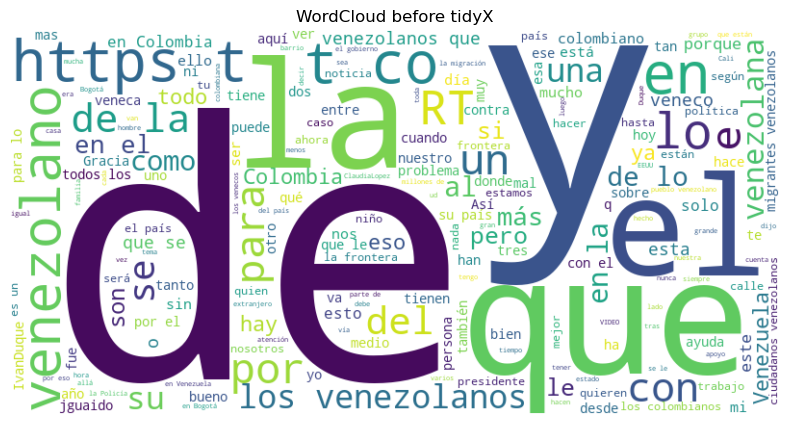

In [63]:
# Combine all documents into a single string
text = " ".join(doc for doc in tweets['Snippet'])

# Generate a word cloud image
wordcloud = WordCloud(background_color = "white", width = 800, height = 400).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.title("WordCloud before tidyX")
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off");


In [78]:
tweets['clean'] = tweets['Snippet'].apply(lambda x: tp.preprocess(x, delete_emojis = False, extract = False))
tweets['clean'] = tweets['clean'].apply(lambda x: tp.space_between_emojis(x))
tweets

,Snippet,clean
0,RT @emilsen_manozca ¿Me regala una moneda pa u...,me regala una moneda pa un cafe eres venezolan...
1,RT @CriptoNoticias Banco venezolano activa ser...,banco venezolano activa servicio para usuarios...
2,Capturado venezolano que asesinó a comerciante...,capturado venezolano que asesino a comerciante...
3,RT @PersoneriaVpar @PersoneriaVpar acompaña al...,acompa a al grupo especial migratorio del cesa...
4,"Bueno ya sacaron la carta de ""amenaza de atent...",bueno ya sacaron la carta de amenaza de atenta...
...,...,...
995,"@VillamilBMauro @ClaudiaLopez Bueno , ya en co...",bueno ya en contexto vemos que el indice de cr...
996,Yo: hice arepas Venezolanes: y eso como lo abr...,yo hice arepas venezolanes y eso como lo abren
997,Guía del migrante https://t.co/dHivUYHHk9 vía ...,guia del migrante via
998,@AuraRobalino Ya sabes lo que sentimos los ven...,ya sabes lo que sentimos los venezolanos a dia...


In [76]:
token_df = tp.unnest_tokens(df = tweets.copy(), input_column = "clean", id_col = None, unique = True)
token_df

,clean,id
0,,246
1,a,"2, 3, 5, 6, 7, 9, 10, 10, 11, 12, 12, 13, 14, ..."
2,abajo,"352, 577"
3,abandonar,"337, 509"
4,abarrotarse,993
...,...,...
6046,🤪,519
6047,🤬,"483, 520, 908, 908"
6048,🤯,615
6049,🤷,"482, 736, 841, 947, 947, 947"


In [79]:
# Load spacy's model
model = spacy.load('es_core_news_lg')

In [80]:
# Apply spanish_lemmatizer function to lemmatize the token
token_df["lemma"] = token_df["clean"].apply(lambda x: tn.spanish_lemmatizer(token = x, model = model))